## KNN (Classification Part).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier


data = pd.read_csv("newData.csv")

# Encode categorical variables
cat_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


# Classification Problem (High vs Low Fare)

median_fare = data["fare_amount_inr"].median()
data["fare_class"] = (data["fare_amount_inr"] > median_fare).astype(int)

X_cls = data.drop(columns=["fare_amount_inr", "trip_id", "fare_class"])
y_cls = data["fare_class"]

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)

# Scale features
scaler_cls = StandardScaler()
X_train_cls = scaler_cls.fit_transform(X_train_cls)
X_test_cls = scaler_cls.transform(X_test_cls)

# Model: KNN Classifier
cls_model = KNeighborsClassifier(n_neighbors=5)
cls_model.fit(X_train_cls, y_train_cls)
y_pred_cls = cls_model.predict(X_test_cls)

# Classification metrics
accuracy = accuracy_score(y_test_cls, y_pred_cls)
f1 = f1_score(y_test_cls, y_pred_cls)


# Results
print("Classification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

📊 Classification Metrics:
Accuracy: 0.8780
F1 Score: 0.8809


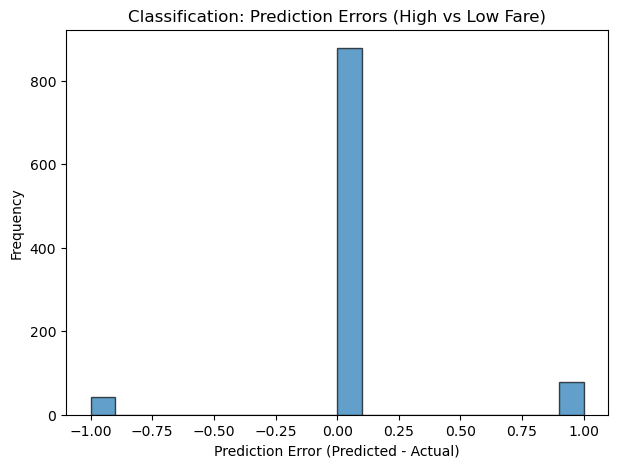

In [ ]:
import matplotlib.pyplot as plt

# Plot Classification: Distribution of Predicted vs Actual
plt.figure(figsize=(7,5))
plt.hist(y_pred_cls - y_test_cls, bins=20, edgecolor="black", alpha=0.7)
plt.xlabel("Prediction Error (Predicted - Actual)")
plt.ylabel("Frequency")
plt.title("Classification: Prediction Errors (High vs Low Fare)")
plt.show()

## if cluster around the zero line, it indicates good predictions

## Random Forest (regression part)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor


# Load dataset

data = pd.read_csv("newData.csv")

# Encode categorical variables
cat_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


# Regression Problem (Predict fare_amount_inr)
X_reg = data.drop(columns=["fare_amount_inr", "trip_id"])
y_reg = data["fare_amount_inr"]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Scale features for regression
scaler_reg = StandardScaler()
X_train_reg = scaler_reg.fit_transform(X_train_reg)
X_test_reg = scaler_reg.transform(X_test_reg)

# Model: Random Forest Regressor
reg_model = RandomForestRegressor(random_state=42)
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

# Regression metrics
r2 = r2_score(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))



# Final Results

print("Regression Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


Regression Metrics:
R² Score: 0.8544
MAE: 466.6867
RMSE: 892.3821


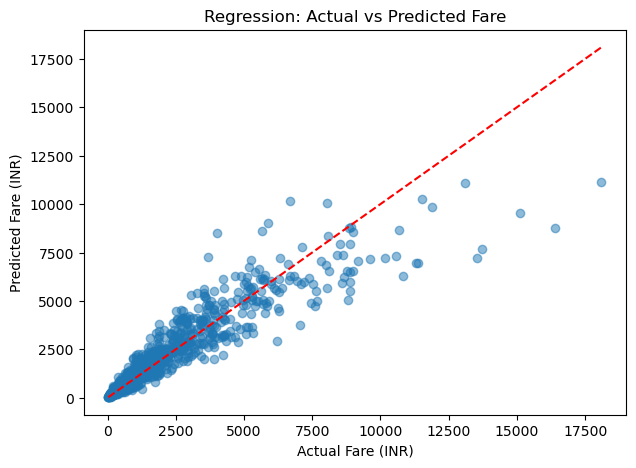

In [ ]:
import matplotlib.pyplot as plt

# Plot Regression: Actual vs Predicted
plt.figure(figsize=(7,5))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel("Actual Fare (INR)")
plt.ylabel("Predicted Fare (INR)")
plt.title("Regression: Actual vs Predicted Fare")
plt.show()

## The red dashed line is the “perfect prediction” line.
#Most points are close to this line → strong model fit.

## Try SVM Model

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

df = pd.read_csv("newData.csv") 

# Encode categorical target (example: user_type)
le = LabelEncoder()
y = le.fit_transform(df['user_type'])   # Premium/Regular → 0/1

# Features
X = df.drop(columns=['trip_id', 'user_type', 'fare_amount_inr'])
X = X.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtypes=='object' else col)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM (RBF kernel is good for non-linear data)
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("SVM Accuracy:", accuracy)
print("SVM F1 Score:", f1)


SVM Accuracy: 0.501
SVM F1 Score: 0.4923702950152594
